In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## image show

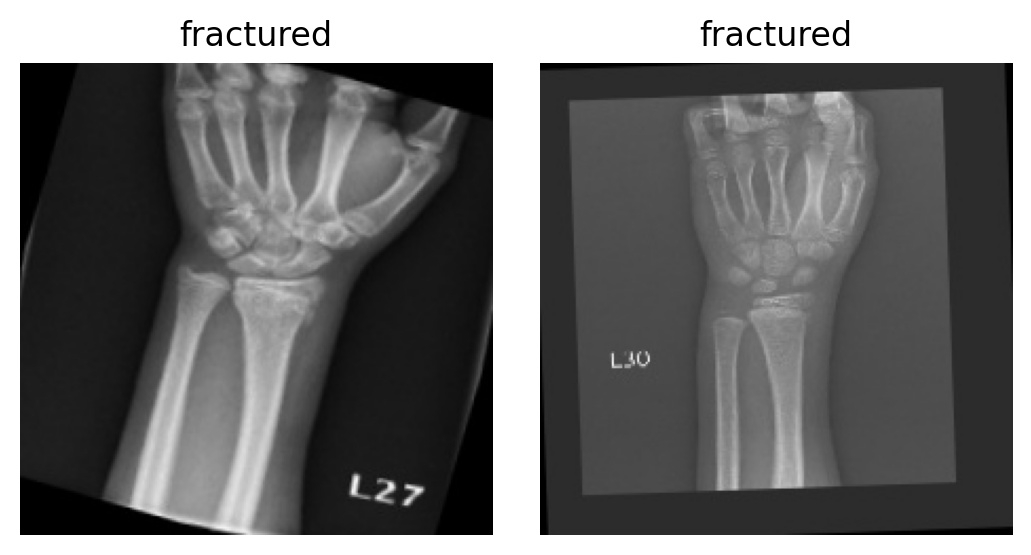

In [ ]:
import matplotlib.pyplot as plt
import os

def show_images(image_dir):
    folder_name = os.path.basename(image_dir)
    # Get the list of image files in the directory
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

    # Create a figure with subplots
    fig, axes = plt.subplots(1, 2, dpi=200)

    # Loop through the image files and display them in subplots
    for i, image_file in enumerate(image_files[60:62]):  # Display only the first two images
        image_path = os.path.join(image_dir, image_file)
        image = plt.imread(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(str(folder_name))

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.1)
    # Show the plot
    plt.show()

# Example usage
image_directory = "/content/drive/MyDrive/bone data/fractured"
show_images(image_directory)


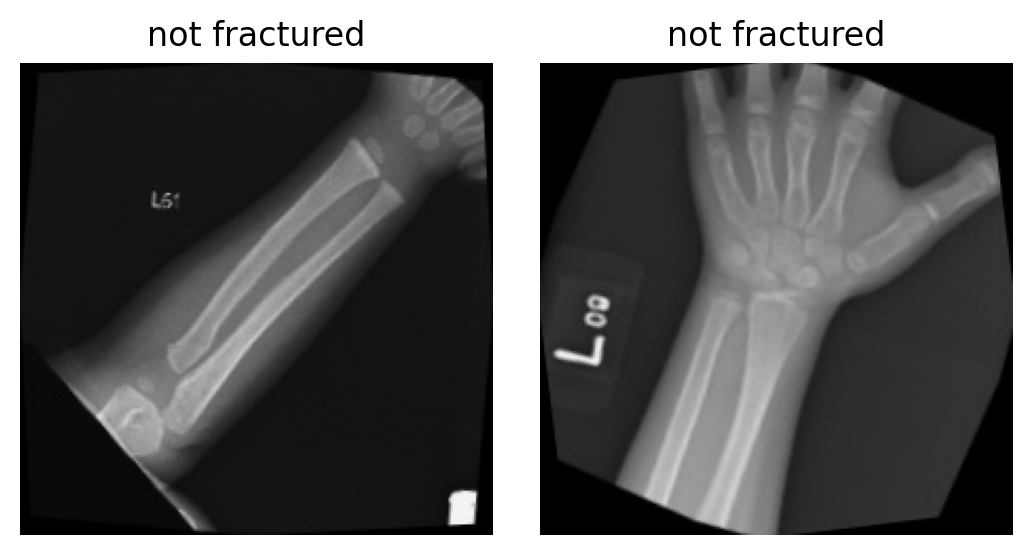

In [ ]:
import matplotlib.pyplot as plt
import os

def show_images(image_dir):
    folder_name = os.path.basename(image_dir)
    # Get the list of image files in the directory
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

    # Create a figure with subplots
    fig, axes = plt.subplots(1, 2, dpi=200)

    # Loop through the image files and display them in subplots
    for i, image_file in enumerate(image_files[6:8]):  # Display only the first two images
        image_path = os.path.join(image_dir, image_file)
        image = plt.imread(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(str(folder_name))

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.1)
    # Show the plot
    plt.show()

# Example usage
image_directory = "/content/drive/MyDrive/bone data/not fractured"
show_images(image_directory)


# Results

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import numpy as np
import seaborn as sns
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import log_loss,cohen_kappa_score
from imblearn.metrics import geometric_mean_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical

# Define the path to the dataset folder
dataset_path = "/content/drive/MyDrive/bone data"


# Define the list of label folders in the dataset folder
label_folders = ["fractured", "not fractured"]

# Define the size of the input images
img_height = 224
img_width = 224

# Define an empty list to store the images and their labels
data = []
labels = []

# Loop over the label folders in the dataset folder
for label_folder in label_folders:
    # Define the path to the label folder
    label_path = os.path.join(dataset_path, label_folder)
    # Loop over the images in the label folder
    for img_name in os.listdir(label_path):
        # Define the path to the image
        img_path = os.path.join(label_path, img_name)
        # Load the image and resize it to the desired size
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_height, img_width))
        # Append the image and its label to the data and labels lists
        data.append(img)
        labels.append(label_folder)

# Convert the data and labels lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Convert the labels to one-hot encoded vectors
# labels = to_categorical(labels)

# Print the shape of the data and labels arrays
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (8863, 224, 224, 3)
Labels shape: (8863,)


In [ ]:
import numpy as np


# Get the unique string values
unique_values = np.unique(labels)

# Create a mapping dictionary
mapping = {value: index for index, value in enumerate(unique_values)}

# Map the string values to numbers
mapped_arr = np.array([mapping[value] for value in labels])

print("Original array:", labels)
print("Mapped array:", mapped_arr)
print("Mapping dictionary:", mapping)


Original array: ['fractured' 'fractured' 'fractured' ... 'not fractured' 'not fractured'
 'not fractured']
Mapped array: [0 0 0 ... 1 1 1]
Mapping dictionary: {'fractured': 0, 'not fractured': 1}


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,mapped_arr, test_size = 0.2,random_state=0,shuffle=True)

# CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
input_shape = (224, 224,3)

model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.6),
    layers.Flatten(),
    # layers.Dense(8, activation = 'relu'),
    layers.Dense(1, activation= 'sigmoid'),
])
# model.build(input_shape=input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 788544)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │         788,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 790,337 (3.01 MB)

 Trainable params: 790,337 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X_train, Y_train,  epochs=10,validation_split=0.1)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - AUC: 0.6081 - Precision: 0.6014 - Recall: 0.5763 - accuracy: 0.5990 - loss: 244.1897 - val_AUC: 0.7339 - val_Precision: 0.6810 - val_Recall: 0.6620 - val_accuracy: 0.6728 - val_loss: 1.6412
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - AUC: 0.8143 - Precision: 0.7391 - Recall: 0.7269 - accuracy: 0.7445 - loss: 1.1227 - val_AUC: 0.7817 - val_Precision: 0.7700 - val_Recall: 0.6173 - val_accuracy: 0.7137 - val_loss: 1.3107
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 0.8823 - Precision: 0.8094 - Recall: 0.8056 - accuracy: 0.8053 - loss: 0.7240 - val_AUC: 0.8156 - val_Precision: 0.7934 - val_Recall: 0.6760 - val_accuracy: 0.7475 - val_loss: 1.0424
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - AUC: 0.9113 - Precision: 0.8326 - Recall: 0.8342 - accuracy: 0.8349 - loss: 0.5805 - val_AUC: 0.8245 - val_Precision: 0.7254 - val_Recall: 0.8045 - val_accuracy: 0.7475 - val_loss: 1.0625
Epoch 5/10
200/200 ━━━━

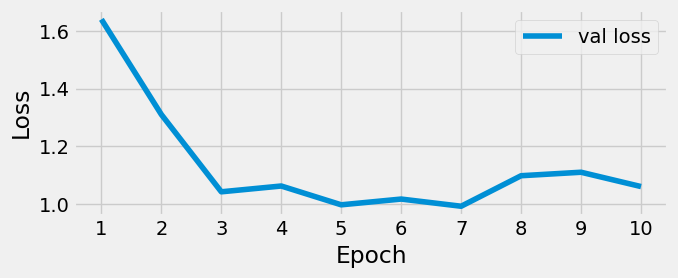

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7,3), dpi = 100)
# plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# scale_factor = 0.002  # The scaling factor for the y-axis values

# # Get the current y-axis limits
# y_min, y_max = plt.ylim()

# # Scale the limits
# scaled_y_min = y_min * scale_factor
# scaled_y_max = y_max * scale_factor

# # Set the scaled limits
# plt.ylim(scaled_y_min, scaled_y_min+3)
plt.grid(True)
plt.tight_layout()

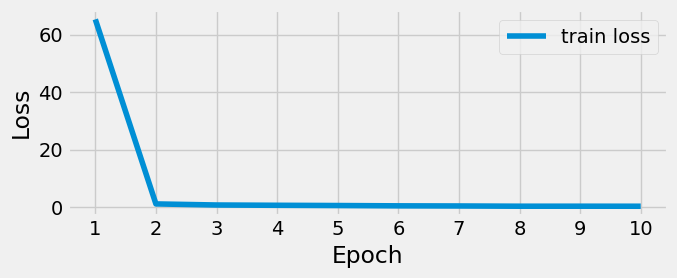

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7,3), dpi = 100)
plt.plot(history.history['loss'], label='train loss')
# plt.plot(history.history['val_loss'], label='val loss')
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# scale_factor = 0.002  # The scaling factor for the y-axis values

# # Get the current y-axis limits
# y_min, y_max = plt.ylim()

# # Scale the limits
# scaled_y_min = y_min * scale_factor
# scaled_y_max = y_max * scale_factor

# # Set the scaled limits
# plt.ylim(scaled_y_min, scaled_y_min+3)
plt.grid(True)
plt.tight_layout()

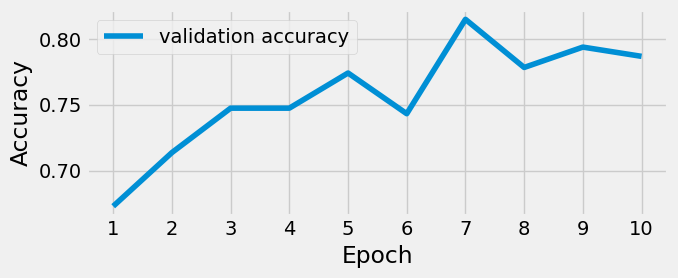

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3), dpi = 100)
# plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()

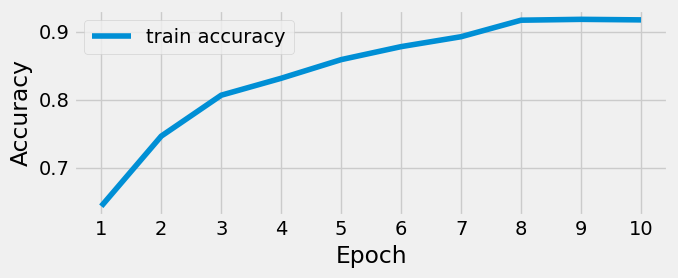

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(7,3), dpi = 100)
plt.plot(history.history['accuracy'], label='train accuracy')
# plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()

In [ ]:
model.evaluate(X_train, Y_train)

222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - AUC: 0.9971 - Precision: 0.9689 - Recall: 0.9880 - accuracy: 0.9784 - loss: 0.0631


[0.15763047337532043,
 0.9602256417274475,
 0.9469739198684692,
 0.9740148782730103,
 0.9875686764717102]

In [ ]:
model.evaluate(X_test,Y_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - AUC: 0.8720 - Precision: 0.8020 - Recall: 0.8568 - accuracy: 0.8216 - loss: 0.9765


[1.0712904930114746,
 0.8099266886711121,
 0.7887473702430725,
 0.8433598279953003,
 0.8656299710273743]

In [ ]:
pred= model.predict(X_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [ ]:
ypred=(pred > 0.5).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,ypred))
cf_matrix=confusion_matrix(Y_test,ypred)
cf_matrix

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       892
           1       0.79      0.84      0.82       881

    accuracy                           0.81      1773
   macro avg       0.81      0.81      0.81      1773
weighted avg       0.81      0.81      0.81      1773



array([[693, 199],
       [138, 743]])

# Xception

In [ ]:
from tensorflow.keras.applications import MobileNet
vggmodel = MobileNet(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
for layer in vggmodel.layers[:]:
	layer.trainable = False

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
input_shape = (224, 224,3)

model = models.Sequential([
    vggmodel,
    layers.Dropout(0.6),
    layers.Flatten(),
    layers.Dense(1, activation= 'sigmoid'),
])
# model.build(input_shape=input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, Y_train, epochs=10,validation_split=0.1 )

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.6965 - loss: 1.2467 - val_accuracy: 0.9083 - val_loss: 0.2788
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.8577 - loss: 0.5457 - val_accuracy: 0.9126 - val_loss: 0.2959
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8900 - loss: 0.4833 - val_accuracy: 0.9422 - val_loss: 0.2197
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9272 - loss: 0.3214 - val_accuracy: 0.9577 - val_loss: 0.1726
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9308 - loss: 0.3217 - val_accuracy: 0.8688 - val_loss: 0.7991
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9376 - loss: 0.2832 - val_accuracy: 0.9281 - val_loss: 0.3684
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9443 - loss: 0.2766 - val_accuracy: 0.9520 - val_loss: 0.2254
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9320 - loss: 0.3317 - val_a

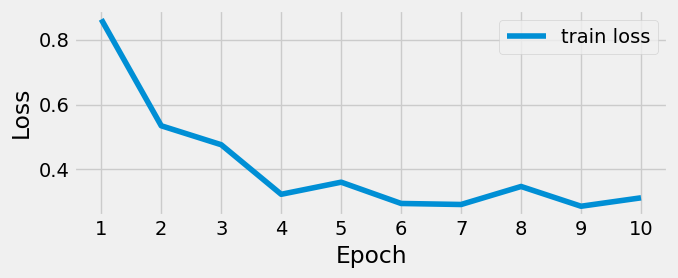

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7,3), dpi = 100)
plt.plot(history.history['loss'], label='train loss')
# plt.plot(history.history['val_loss'], label='val loss')
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.xlabel("Epoch")
plt.ylabel("Loss")

# scale_factor = 0.04  # The scaling factor for the y-axis values

# # Get the current y-axis limits
# y_min, y_max = plt.ylim()

# # Scale the limits
# scaled_y_min = y_min * scale_factor
# scaled_y_max = y_max * scale_factor

# # Set the scaled limits
# plt.ylim(scaled_y_min, scaled_y_min+3)

plt.grid(True)

plt.legend()
plt.tight_layout()

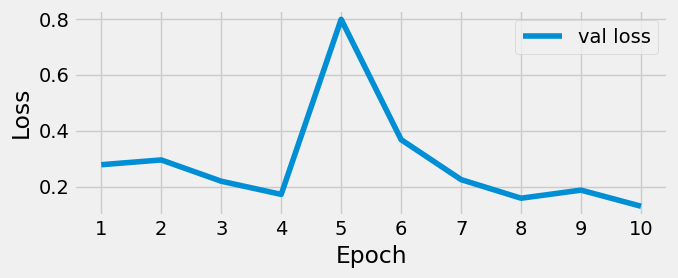

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7,3), dpi = 100)
# plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.xlabel("Epoch")
plt.ylabel("Loss")

# scale_factor = 0.04  # The scaling factor for the y-axis values

# # Get the current y-axis limits
# y_min, y_max = plt.ylim()

# # Scale the limits
# scaled_y_min = y_min * scale_factor
# scaled_y_max = y_max * scale_factor

# # Set the scaled limits
# plt.ylim(scaled_y_min, scaled_y_min+3)

plt.grid(True)

plt.legend()
plt.tight_layout()

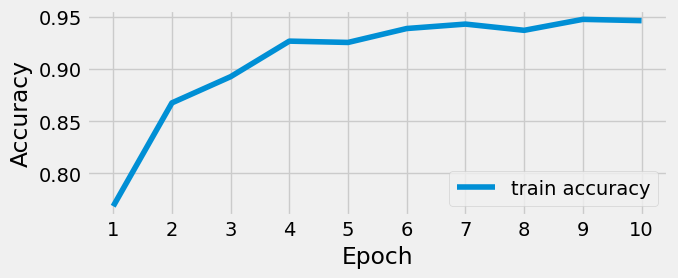

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3), dpi = 100)
plt.plot(history.history['accuracy'], label='train accuracy')
# plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.grid(True)

plt.legend()
plt.tight_layout()

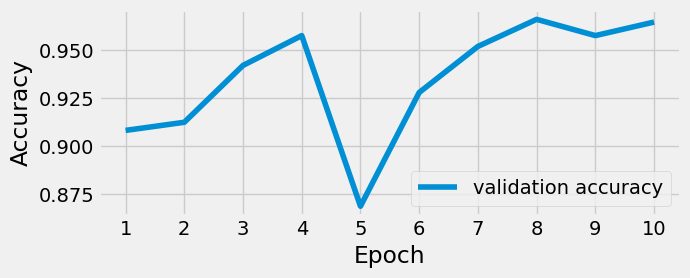

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3), dpi = 100)
# plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.grid(True)

plt.legend()
plt.tight_layout()

In [ ]:
model.evaluate(X_test,Y_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9723 - loss: 0.1342


[0.14622202515602112, 0.9695431590080261]

In [ ]:
pred= model.predict(X_test)
ypred=(pred > 0.5).astype(int)

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,ypred))
cf_matrix=confusion_matrix(Y_test,ypred)
cf_matrix

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       892
           1       0.99      0.95      0.97       881

    accuracy                           0.97      1773
   macro avg       0.97      0.97      0.97      1773
weighted avg       0.97      0.97      0.97      1773



array([[885,   7],
       [ 47, 834]])

# Novel

In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical

# Define the path to the dataset folder
dataset_path = "/content/drive/MyDrive/bone data"


# Define the list of label folders in the dataset folder
label_folders = ["fractured", "not fractured"]

# Define the size of the input images
img_height = 224
img_width = 224

# Define an empty list to store the images and their labels

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications import MobileNet


def create_vgg16_based_model(input_shape, num_classes):
    vggmodel = MobileNet(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
    for layer in vggmodel.layers[:]:
      layer.trainable = False

    # Create a new model
    model = Sequential()
    # Add the VGG16 base model
    model.add(vggmodel)
    # Flatten the output layer to 1 dimension
    model.add(Flatten())
    # Add a final dense layer for classification with the number of classes and softmax activation
    model.add(Dense(600, activation='softmax'))

    return model

# Example input shape (based on your image dimensions and channels)
input_shape = (224, 224, 3)

# Example number of classes (based on your dataset)
num_classes = 2

# Create the VGG16 based model
vgg16_based_model = create_vgg16_based_model(input_shape, num_classes)

main_df = pd.DataFrame()

# Create a dictionary to map label folders to numerical labels
label_mapping = {label: idx for idx, label in enumerate(label_folders)}

# Loop over the label folders in the dataset folder
for label_folder in label_folders:
    data = []
    labels = []
    # Define the path to the label folder
    label_path = os.path.join(dataset_path, label_folder)

    # Loop over the images in the label folder
    for img_name in os.listdir(label_path):
        # Define the path to the image
        img_path = os.path.join(label_path, img_name)
        # Load the image and resize it to the desired size
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_height, img_width))
        # Append the image and its numerical label to the data and labels lists
        data.append(img)
        labels.append(label_mapping[label_folder])
    data = np.array(data)
    features_train = vgg16_based_model.predict(data)
    df1=pd.DataFrame(features_train)
    df1['label']=labels
    # Append the temporary DataFrame to the main DataFrame
    main_df = pd.concat([main_df, df1], ignore_index=True)

# # Convert the data and labels lists to numpy arrays
# data = np.array(data)
# labels = np.array(labels)

# # Convert the labels to one-hot encoded vectors
# # labels = to_categorical(labels, num_classes=len(label_folders))

# # Print the shape of the data and labels arrays
# print("Data shape:", data.shape)
# print("Labels shape:", labels.shape)


140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step


In [ ]:
main_df

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,label
0,0.000064,0.000058,0.000186,0.000376,0.000012,0.000194,0.001267,0.000599,0.000699,0.000010,...,0.000010,0.005765,0.004638,0.009919,0.001732,0.000088,0.000093,0.000255,0.000340,0
1,0.000985,0.000906,0.001429,0.000065,0.000108,0.000436,0.000042,0.000242,0.000048,0.000006,...,0.000050,0.002258,0.001393,0.003307,0.000506,0.000842,0.000067,0.003320,0.000369,0
2,0.000048,0.000048,0.000798,0.000008,0.001030,0.000266,0.000103,0.000082,0.000067,0.000003,...,0.000002,0.008174,0.000790,0.000744,0.001581,0.000071,0.000013,0.000103,0.000106,0
3,0.000314,0.000006,0.002644,0.000162,0.000183,0.000676,0.000178,0.001916,0.013908,0.000001,...,0.000002,0.000337,0.003100,0.032030,0.000959,0.000408,0.000032,0.001688,0.000347,0
4,0.000308,0.000070,0.004618,0.000024,0.000304,0.000214,0.000107,0.000222,0.000020,0.000002,...,0.000016,0.000538,0.001019,0.006505,0.000711,0.000356,0.000004,0.000268,0.000114,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858,0.000047,0.000025,0.012631,0.000234,0.000120,0.003375,0.000019,0.000315,0.000138,0.000023,...,0.000057,0.000476,0.000833,0.002830,0.001137,0.005197,0.000109,0.001107,0.000736,1
8859,0.000496,0.000015,0.000909,0.000045,0.000777,0.004212,0.000019,0.000890,0.000083,0.000002,...,0.000098,0.000371,0.001299,0.001606,0.010364,0.000281,0.000041,0.000071,0.002421,1
8860,0.002923,0.000004,0.000657,0.000085,0.000178,0.000106,0.000688,0.002946,0.000085,0.000001,...,0.000011,0.000613,0.009011,0.015077,0.004362,0.000068,0.000129,0.001393,0.000858,1
8861,0.002056,0.000016,0.000708,0.000082,0.000216,0.000522,0.000156,0.000041,0.000364,0.000013,...,0.000003,0.001953,0.002479,0.015102,0.003851,0.000070,0.000161,0.000114,0.000089,1


In [ ]:

main_df['label'].value_counts()

,count
label,
0,4480
1,4383


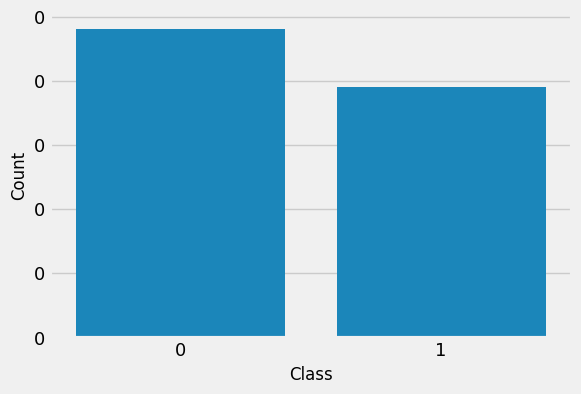

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as tkr
def func(x, pos):  # formatter function takes tick label and tick position
    s = '%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + ','.join(reversed(groups))

y_format = tkr.FuncFormatter(func)  # make formatter
plt.figure(figsize=(6,4), dpi = 100)
p=sns.countplot(x='label',data= main_df )
p.yaxis.set_major_formatter(y_format)
p.tick_params(labelsize=13)
# plt.xticks(rotation = 50)
plt.xlabel("Class",fontsize=12)
plt.ylabel("Count",fontsize=12)
# plt.savefig('barchart.pdf',dpi=100,bbox_inches = 'tight')
plt.show()


In [ ]:
x=main_df.drop(['label'],axis=1)
y=main_df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2,random_state=0,shuffle=True)


In [ ]:
# df1.to_csv('/content/drive/MyDrive/childvggfeatures.csv',index=False)

## Result with spatial features

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
# kf = KFold(n_splits=10, shuffle=True)
# clf = KNeighborsClassifier(n_neighbors=2)
# score = cross_val_score(clf, result, y, cv= kf, scoring="accuracy")
# print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

Training time: 0.01623249053955078s
accuracy score 0.7219402143260011
error rate: 0.2780597856739989
              precision    recall  f1-score   support

           0       0.67      0.87      0.76       892
           1       0.81      0.57      0.67       881

    accuracy                           0.72      1773
   macro avg       0.74      0.72      0.72      1773
weighted avg       0.74      0.72      0.72      1773



array([[778, 114],
       [379, 502]])

In [ ]:
import lightgbm as lgb
print("LGB")
clf = lgb.LGBMClassifier(n_estimators=300)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
print('accuracy score',round(accuracy_score(Y_test,dtP3),2))
# kf = KFold(n_splits=10, shuffle=True)
# clf=RandomForestClassifier(max_depth=300, random_state=0,n_estimators=300)
# score = cross_val_score(clf, x, y, cv= kf, scoring="accuracy")
# print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

LGB
[LightGBM] [Info] Number of positive: 3502, number of negative: 3588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153000
[LightGBM] [Info] Number of data points in the train set: 7090, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493935 -> initscore=-0.024261
[LightGBM] [Info] Start training from score -0.024261
Training time: 29.463422298431396s
error rate: 0.07106598984771573
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       892
           1       0.91      0.95      0.93       881

    accuracy                           0.93      1773
   macro avg       0.93      0.93      0.93      1773
weighted avg       0.93      0.93      0.93      1773

accuracy score 0.93


array([[814,  78],
       [ 48, 833]])

In [ ]:
from sklearn.linear_model import LogisticRegression
print("LR")
clf=LogisticRegression()
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
print('accuracy score',round(accuracy_score(Y_test,dtP3),2))
# kf = KFold(n_splits=10, shuffle=True)
# clf=SVC(kernel='linear')
# score = cross_val_score(clf, result, y, cv= kf, scoring="accuracy")
# print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

LR
Training time: 0.24534153938293457s
error rate: 0.3570219966159053
              precision    recall  f1-score   support

           0       0.63      0.70      0.66       892
           1       0.66      0.59      0.62       881

    accuracy                           0.64      1773
   macro avg       0.64      0.64      0.64      1773
weighted avg       0.64      0.64      0.64      1773

accuracy score 0.64


array([[624, 268],
       [365, 516]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
clf=RandomForestClassifier(max_depth=300, random_state=0,n_estimators=300)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
print('accuracy score',round(accuracy_score(Y_test,dtP3),2))
# kf = KFold(n_splits=10, shuffle=True)
# clf=RandomForestClassifier(max_depth=300, random_state=0,n_estimators=300)
# score = cross_val_score(clf, result, y, cv= kf, scoring="accuracy")
# print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

RF
Training time: 70.00778126716614s
error rate: 0.11054709531866891
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       892
           1       0.87      0.91      0.89       881

    accuracy                           0.89      1773
   macro avg       0.89      0.89      0.89      1773
weighted avg       0.89      0.89      0.89      1773

accuracy score 0.89


array([[773, 119],
       [ 77, 804]])

## With Proposed

In [ ]:
import numpy as np
import lightgbm as lgb

RF=lgb.LGBMClassifier(n_estimators=60)
rfPre1=RF.fit(x, y).predict_proba(x)
rf=pd.DataFrame(rfPre1)

[LightGBM] [Info] Number of positive: 4383, number of negative: 4480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153000
[LightGBM] [Info] Number of data points in the train set: 8863, number of used features: 600
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494528 -> initscore=-0.021890
[LightGBM] [Info] Start training from score -0.021890


In [ ]:
# result = pd.concat([pl,rf], axis=1).reindex(pl.index)
# result=pd.read_csv('/content/drive/MyDrive/childfeaturefused.csv')
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(rf,y,test_size = 0.2,random_state=0,shuffle=True)
# result.columns=['1','2','3','4']

In [ ]:
# result.to_csv('/content/drive/MyDrive/childfeaturefused.csv',index=False)

In [ ]:
import lightgbm as lgb
print("LGB")
clf = lgb.LGBMClassifier(n_estimators=10)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
print('accuracy score',accuracy_score(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf=lgb.LGBMClassifier(n_estimators=10)
score = cross_val_score(clf, rf, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

LGB
[LightGBM] [Info] Number of positive: 3502, number of negative: 3588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 7090, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493935 -> initscore=-0.024261
[LightGBM] [Info] Start training from score -0.024261
Training time: 0.04159903526306152s
error rate: 0.012972363226170347
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       892
           1       0.99      0.99      0.99       881

    accuracy                           0.99      1773
   macro avg       0.99      0.99      0.99      1773
weighted avg       0.99      0.99      0.99      1773

accuracy score 0.9870276367738297
[LightGBM] [Info] Number of positive: 3914, number of negative: 4062
[LightGB

array([[881,  11],
       [ 12, 869]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = KNeighborsClassifier(n_neighbors=2)
score = cross_val_score(clf, rf, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

Training time: 0.0076313018798828125s
accuracy score 0.9802594472645234
error rate: 0.01974055273547659
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       892
           1       0.99      0.97      0.98       881

    accuracy                           0.98      1773
   macro avg       0.98      0.98      0.98      1773
weighted avg       0.98      0.98      0.98      1773

0.9764 accuracy with a standard deviation of 0.0042


array([[885,   7],
       [ 28, 853]])

In [ ]:
from sklearn.linear_model import LogisticRegression
print("LR")
clf=LogisticRegression()
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
print('accuracy score',round(accuracy_score(Y_test,dtP3),2))
kf = KFold(n_splits=10, shuffle=True)
clf=LogisticRegression()
score = cross_val_score(clf, rf, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

LR
Training time: 0.035185813903808594s
error rate: 0.012408347433728095
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       892
           1       0.99      0.99      0.99       881

    accuracy                           0.99      1773
   macro avg       0.99      0.99      0.99      1773
weighted avg       0.99      0.99      0.99      1773

accuracy score 0.99
0.9851 accuracy with a standard deviation of 0.0034


array([[881,  11],
       [ 11, 870]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
clf=RandomForestClassifier(max_depth=300, random_state=0,n_estimators=300)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
print('accuracy score',accuracy_score(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf=RandomForestClassifier(max_depth=300, random_state=0,n_estimators=300)
score = cross_val_score(clf, rf, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

RF
Training time: 3.910393238067627s
error rate: 0.020868584320360983
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       892
           1       0.98      0.98      0.98       881

    accuracy                           0.98      1773
   macro avg       0.98      0.98      0.98      1773
weighted avg       0.98      0.98      0.98      1773

accuracy score 0.979131415679639
0.9770 accuracy with a standard deviation of 0.0043


array([[875,  17],
       [ 20, 861]])

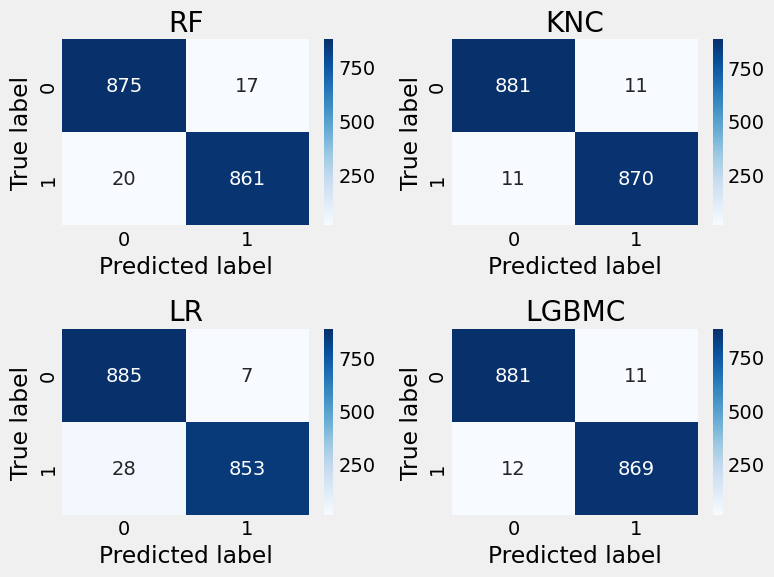

In [ ]:
array1=[[875,  17],
       [ 20, 861]]

array2=[[881,  11],
       [ 11, 870]]

array3=[[885,   7],
       [ 28, 853]]

array4=[[881,  11],
       [ 12, 869]]

# Create a figure with 8 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6),dpi=100)

# Create a list of confusion matrices and corresponding titles
cms =    [array1, array2, array3, array4]
titles = ['RF'  ,'KNC',   'LR',   'LGBMC' ]

# Plot each confusion matrix as a heatmap on a subplot
for ax, cm, title in zip(axes.flat, cms, titles):
    sns.heatmap(cm, annot=True, cmap='Blues', ax=ax,fmt='g')
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
# axes.flat[-1].axis('off')
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)
fig.tight_layout()
# Display the figure
# plt.savefig('froncm.pdf')
plt.show()